# Logistic Regression
## Working Principle Introduction

Logistic regression estimates the probability of a binary outcome based on one or more predictor variables. It works by applying a logistic function to model the probability that a given input point belongs to a certain class, which outputs values between 0 and 1. This is useful for classification tasks where the outcome is categorical, such as spam detection or disease diagnosis. Unlike linear regression, logistic regression can handle situations where the relationship between the predictors and the probability of the outcome is not linear.

The logistic regression model is expressed as follows:

$$
P(Y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n)}}
$$

Where:
- $P(Y=1)$ is the probability that the dependent variable $Y$ equals 1, given the predictors.
- $e$ is the base of the natural logarithm.
- $\beta_0$ is the intercept term of the model.
- $\beta_1, \beta_2, ..., \beta_n$ are the coefficients for each predictor variable $X_1, X_2, ..., X_n$.

<div align="center">
<img src="Logistic.png" alt="alt text" width="450"/>
</div>

This image illustrates a logistic regression curve. The horizontal axis represents the independent variable X, and the vertical axis represents the dependent variable Y, which takes on a value between 0 and 1. The S-shaped curve (sigmoid function) shows the probability of 
Y being 1 as X increases. The dotted lines indicate that the predicted values of Y are constrained within the 0 to 1 range, characteristic of logistic regression used for binary classification.

# Data Processing
I utilized the Breast Cancer Dataset to perform logistic regression. Initially, I processed the dataset by standardizing it, identifying the dependent variable, selecting the independent variables, and then splitting the dataset into training and testing sets.


In [15]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target


In [17]:
# Data preprocessing: Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Logistic Function Built
I have developed several functions to facilitate logistic regression analysis. For example, the sigmoid function computes the logistic function essential for the binary classification. The loss_function calculates the cost of a given set of weights, which is crucial for evaluating the performance of the model. 

In [19]:

import numpy as np

def sigmoid(X, weight):
    #Calculate the sigmoid of the given input.
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))

def loss_function(X, y, weights):
    #Compute the loss function for logistic regression.
    h = sigmoid(X, weights)
    m = len(y)
    loss = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
    return loss

def gradient_descent(X, h, y):
    #Calculate the gradient descent for logistic regression.
    m = len(y)
    gradient = np.dot(X.T, (h - y)) / m
    return gradient

def update_weight_loss(weight, learning_rate, gradient):
    #Update weights using the calculated gradient.
    return weight - learning_rate * gradient

class LogisticRegression:
    def __init__(self, lr=0.05, epochs=25):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.loss = []

    def fit(self, X, y):        
        self.weights = np.zeros(X.shape[1])
                 
        for _ in range(self.epochs):        
            # Gradient Descent
            y_hat = sigmoid(X, self.weights)
            gradient = gradient_descent(X, y_hat, y)
            self.weights = update_weight_loss(self.weights, self.lr, gradient)
            # Saving Progress
            self.loss.append(loss_function(X, y, self.weights)) 
    
    def predict(self, X):        
        #Predict binary labels for the given input data.
        z = sigmoid(X, self.weights)
        # Returning binary result
        return [1 if i > 0.5 else 0 for i in z]

# Model Training and Evaluation
I trained my logistic regression model on the training set and then used it to make predictions on the test set. I compared the predicted labels with the actual labels to gauge the model's performance. To quantify its accuracy, I calculated how often the model's predictions matched the true outcomes, and the accuracy score was printed out along with the predictions and true labels.

In [20]:
# Training the custom logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

In [21]:
# Predictions and model evaluation
y_pred = model.predict(X_test)
print('Predicted labels:', y_pred)
print('Actual labels:', y_test.tolist())

Predicted labels: [1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1]
Actual labels: [1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,

In [23]:
# Calculating accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9649122807017544


# Performance Visualization
I plotted the loss over the epochs, which shows how the model's error decreased as it learned. Then, I created a confusion matrix to visualize the model's predictions against the actual values, giving a clear picture of its performance.

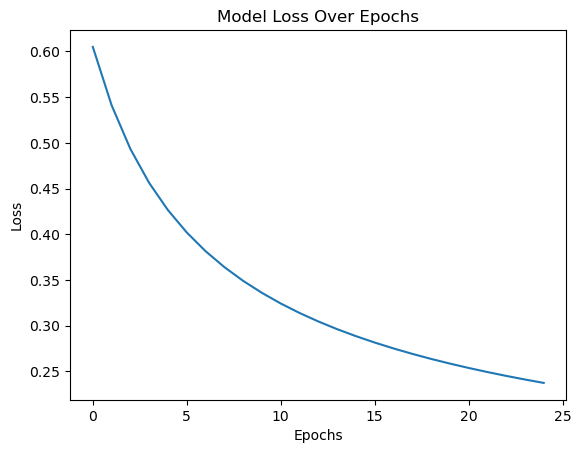

In [22]:
# Plotting the loss over epochs
plt.plot(model.loss)
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

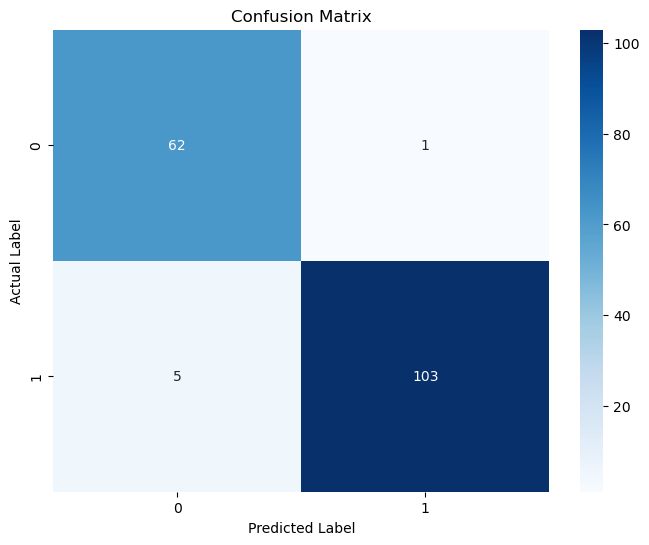

In [24]:
# Plotting Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Conclusion
Based on the Breast Cancer dataset, I've achieved a high accuracy of 0.96 with my logistic regression model. The model loss plot indicates a strong downward trend, reflecting significant learning during training. The confusion matrix shows an impressive number of true positive and true negative predictions, with very few misclassifications, demonstrating the model's robust predictive capability.